### Computer Vision Internship Program



#### Practical Task description:
Your task is to write to a pipeline to classify images from MNIST dataset
(http://yann.lecun.com/exdb/mnist/)  using Neural Networks!



![alt text](mnist.png "Title")


##### To complete this task, you will have to implement the following steps:
<br> 1. Download and read the data - 10 points
<br> 2. Show how you use augmentation functions. To get the points, visualize the original image vs augmented image using 4 augmentation techniques of your choice - 10 points
<br> 3. Implement a Neural Network which classifies given images. You can use any deep learning framework - 10 points
<br> 4. Implement a training procedure using your dataloader, augmentation functions and neural network - 10 points
<br> 5. Plot loss graph - 10 points
<br> 6. Print accuracy of your model on test set -  10 points
<br> 7. Show us how your model works! Plot a few input images and corresponding predictions of your model - 10 points
<br> 8. Upload your work to github - 5 points. Google/dropbox/yandex drive - 0 points

Max = 75 points!

##### Main notes:
<br> *- implement your work in provided jupyter notebook 
<br> - you can use any framework 
<br> - we are not too strict about the requirements: if your work corresponds to the task wording, the chances are you will get the full points*


Please, upload to a google/dropbox/yandex drive or github  and send the link to the following google form: https://docs.google.com/forms/d/e/1FAIpQLSeeYILriugs1Vdxa3r01nS1469VT-_t_ZCNF18zwQVl-XKkHQ/viewform?usp=sf_link 

If you have any questions, please mail to:
olzhas.kabdolov@btsdigital.kz and rustem.burkhanov@btsdigital.kz 

**The deadline is 27th of May, 12 o'Clock in the noon**


####  Good luck and have fun!


##### Task 1. Dataloader

The information about the data_set
X_train (60000, 28, 28)
Y_train (60000,)
X_test (10000, 28, 28)
Y_test (10000,)


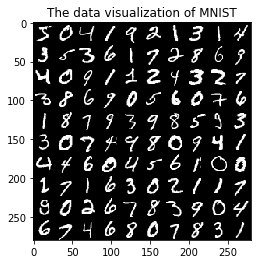

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.utils import shuffle 
import tensorflow as tf
from skimage.util import random_noise
import cv2
from scipy.misc import imresize
from keras.utils import to_categorical

def load_data():
    505
    (X_train, Y_train), (X_test, Y_test) = mnist.load_data()
    print("The information about the data_set")
    print("X_train", X_train.shape)
    print("Y_train", Y_train.shape)
    print("X_test", X_test.shape)
    print("Y_test", Y_test.shape)

    row,col = X_train[0].shape

    X_train = X_train.reshape(X_train.shape[0], row, col, 1)
    X_test  = X_test.reshape(X_test.shape[0], row, col, 1)

    Y_train = Y_train.reshape(Y_train.shape[0], 1)
    Y_test = Y_test.reshape(Y_test.shape[0], 1)

    Y_train = to_categorical(Y_train)
    Y_test = to_categorical(Y_test)
    
    return X_train, Y_train, X_test, Y_test

X_train, Y_train, X_test, Y_test = load_data()

# function for data visualization 
def visualize(X, classes = 10, title = "The data visualization of MNIST"):
    index = 0
    dim = 28
    result_plot = np.zeros((dim * classes, dim * classes))
    
    for i in range(classes):
        for j in range(classes):
            result_plot[i * dim: (i + 1)*dim, j*dim: (j + 1)*dim] = X[index].reshape(28,28)
            index += 1
    
    plt.imshow(result_plot, cmap = "gray")
    plt.title(title)
    plt.show()

visualize(X_train)


##### Task 2. Augmentation

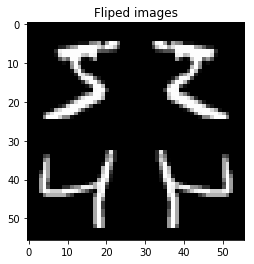

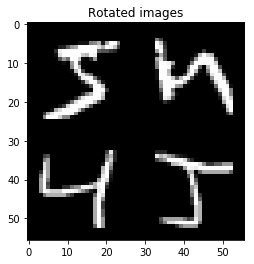

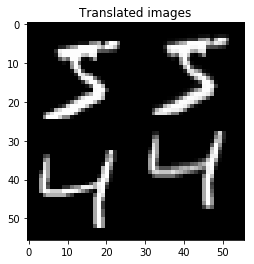

/home/user-1/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


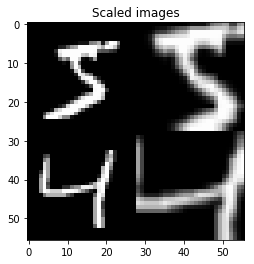

In [6]:
# flipping the data
def flip(X):
    return np.fliplr(X)  

X_1 = X_train[0]
X_2 = X_train[2]
X_flipped_1 = flip(X_1)
X_flipped_2 = flip(X_2)
visualize([X_1, X_flipped_1, X_2, X_flipped_2], classes = 2, title = "Fliped images")

# rotating the data
def rotate(X):
    return np.rot90(X)

X_rotated_1 = rotate(X_1)
X_rotated_2 = rotate(X_2)
visualize([X_1, X_rotated_1, X_2, X_rotated_2], classes = 2, title = "Rotated images")

# translating the data
def translate(X):
    return tf.contrib.keras.preprocessing.image.random_shift(X, 0.2, 0.2, row_axis=0, col_axis=1, channel_axis=1)

X_translated_1 = translate(X_1)
X_translated_2 = translate(X_2)
visualize([X_1, X_translated_1, X_2, X_translated_2], classes = 2, title = "Translated images")

# scaling the image
def scale(X):
    X_ = tf.image.crop_to_bounding_box(X, 5,5,16,16)
    changed = tf.image.resize_images(X_, (28,28))
    sess = tf.InteractiveSession()
    changed = changed.eval()
    return changed
    
X_sheared_1 = scale(X_1)
X_sheared_2 = scale(X_2)
visualize([X_1, X_sheared_1, X_2, X_sheared_2], classes = 2, title = "Scaled images")


    

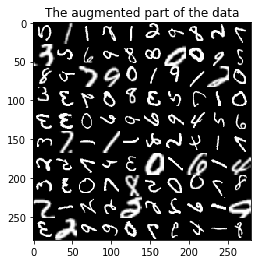

In [8]:
from multiprocessing import Pool
from sklearn.utils import shuffle

def augmented_data(X_train, Y_train):
    X_train_new = X_train[0:700].copy()
    Y_train_new = Y_train[0:700].copy()
    with Pool(4) as p:
        X_train_new[0:250] = p.map(flip, X_train_new[0:250])
        X_train_new[250:500] = p.map(rotate, X_train_new[250:500])
        X_train_new[500:600] = p.map(translate, X_train_new[500:600])
    X_train_new[600:700] = list(map(scale, X_train_new[600:700]))  
    X_train_new, Y_train_new = shuffle(X_train_new, Y_train_new, random_state = 0)
    return X_train_new,Y_train_new
    
X_augmented, Y_augmented = augmented_data(X_train, Y_train)

X_train = np.vstack([X_train, np.zeros((700, 28, 28, 1))])
Y_train = np.vstack([Y_train, np.zeros((700, 10))])

X_train[60000:60700] = X_augmented
Y_train[60000:60700] = Y_augmented

visualize(X_train[60000:60700],title = "The augmented part of the data")

##### Task 4. Train loop && Task 5. Loss plot

---HERE-----

 ----MODEL IS CREATED----

 -----DATA IS READY-----
(61400, 28, 28, 1)
(61400, 10)
Epoch 1/5
61400/61400 [==============================] - 12s 189us/step - loss: 0.1384 - acc: 0.9582
Epoch 2/5
61400/61400 [==============================] - 11s 187us/step - loss: 0.0564 - acc: 0.9811
Epoch 3/5
61400/61400 [==============================] - 11s 185us/step - loss: 0.0445 - acc: 0.9857
Epoch 4/5
61400/61400 [==============================] - 11s 173us/step - loss: 0.0375 - acc: 0.9879
Epoch 5/5
61400/61400 [==============================] - 11s 179us/step - loss: 0.0335 - acc: 0.9895


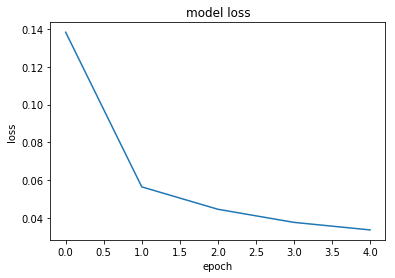


 -----TRAINING IS DONE-----
10000/10000 [==============================] - 1s 85us/step

acc: 99.57%


In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
import os

class AkezhanNet:

    def __init__(self):
        model = Sequential()
        model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
        model.add(Conv2D(64, (3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))
        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(10, activation='softmax'))
        self.model = model
        
    def train(self, X_train, Y_train, epochs, batch_size):
        history = self.model.fit(X_train, Y_train, epochs, batch_size)
        plt.plot(history.history['loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.show()

    def evaluate(self, X_valid, Y_valid):
        scores = self.model.evaluate(X_valid, Y_valid)
        print("\n%s: %.2f%%" % (self.model.metrics_names[1], scores[1]*100))
        return scores

    def predict(self, X_test):
        return self.model.predict(X_test)

    def save_w(self, path_name):
        self.model.save_weights(path_name)

    def load_w(self, path_name):
        self.model.load_weights(path_name)        
    
    def compile(self):
        opt = SGD(lr = 0.01)
        self.model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    

print("---HERE-----")
akezh = AkezhanNet()
print("\n", "----MODEL IS CREATED----")
print("\n", "-----DATA IS READY-----")


if (not os.path.exists('./model.h5')):
    akezh.compile()
    print(X_train.shape)
    print(Y_train.shape)
    akezh.train(X_train, Y_train, 64, 5)
    akezh.save_w(os.path.abspath("model.h5"))
    print("\n", "-----TRAINING IS DONE-----")
else:
    akezh.load_w(os.path.abspath("model.h5"))
    akezh.compile()
    print("\n", "-----WEIGHTS ARE LOADED-----")

random

##### Task 6. Test set accuracy

In [17]:
scores = akezh.evaluate(X_test, Y_test)


10000/10000 [==============================] - 1s 100us/step

acc: 99.57%


##### Task 7. Inference

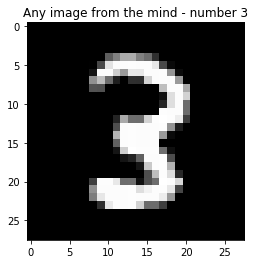

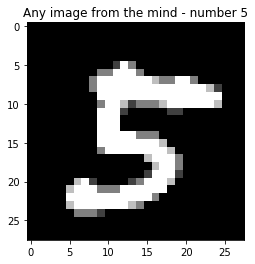

THE PREDICTED LABES FOR FIRST IS 3
THE PREDICTED LABES FOR SECOND IS 5


In [74]:

X_any_1 = X_test[505]
Y_any_1 = Y_test[505]
visualize([X_any_1], classes = 1, title = "Any image from the mind - number {}".format(np.where((Y_any_1[:] == 1))[0][0]))

X_any_2 = X_test[710]
Y_any_2 = Y_test[710]
visualize([X_any_2], classes = 1, title = "Any image from the mind - number {}".format(np.where((Y_any_2[:] == 1))[0][0]))

Y_predicted_1 = akezh.predict(X_test[505:506])
Y_predicted_2 = akezh.predict(X_test[710:711])

print("THE PREDICTED LABES FOR FIRST IS {}".format(np.where(Y_predicted_1[0] > 0.5)[0][0]))
print("THE PREDICTED LABES FOR SECOND IS {}".format(np.where(Y_predicted_2[0] > 0.5)[0][0]))
